#gdrive access


/content/gdrive/MyDrive/STUDY/Dacon22

In [2]:
from google.colab import drive,files
drive.mount('/content/gdrive')#드라이브 마운트

Mounted at /content/gdrive


#library loading

In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warring message
import warnings
warnings.filterwarnings(action='ignore')

#import data

In [3]:
train=pd.read_csv('/content/gdrive/MyDrive/STUDY/Dacon22/와인품질분류/data/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/STUDY/Dacon22/와인품질분류/data/test.csv')

#simple EDA((Exploratory Data Analysis))

In [5]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [6]:
train.info() # train data 열 별의 정보를 살펴봄 // 결측치는 없는 경우이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


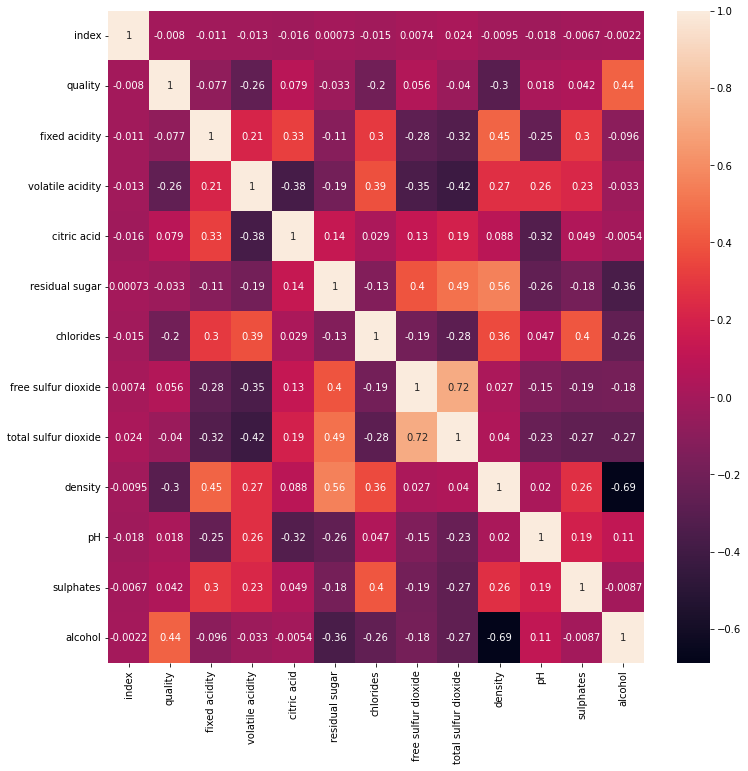

In [8]:
#train의 변수 간 상관관계를 살펴봅니다.
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(),annot=True)

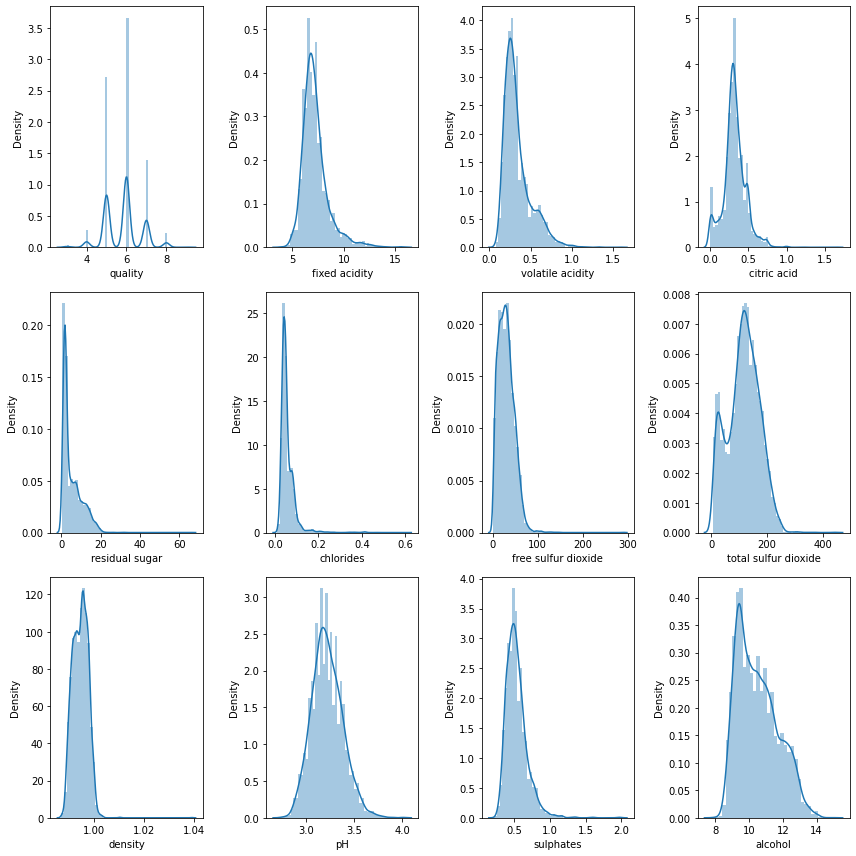

In [9]:
#train의 각 변수별 분포를 살펴봄
plt.figure(figsize=(12,12))

for i in range(1,13):
  plt.subplot(3,4,i)
  sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

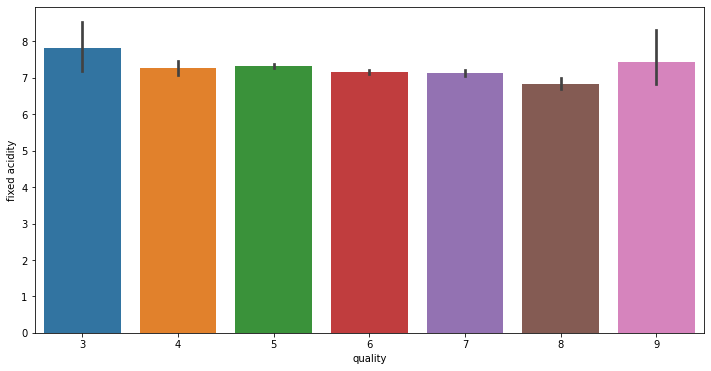

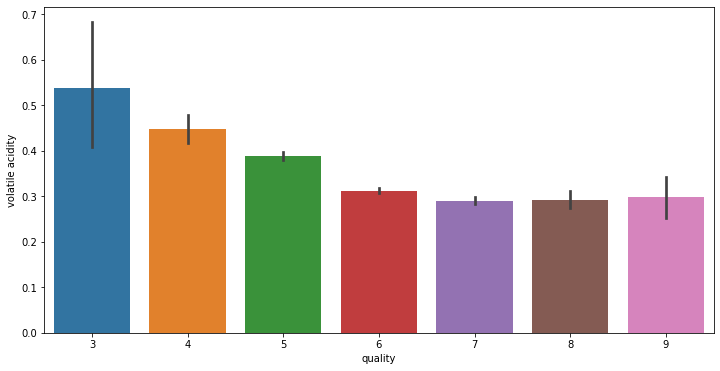

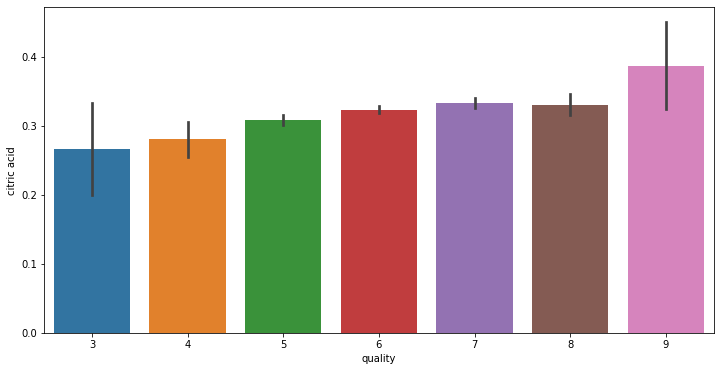

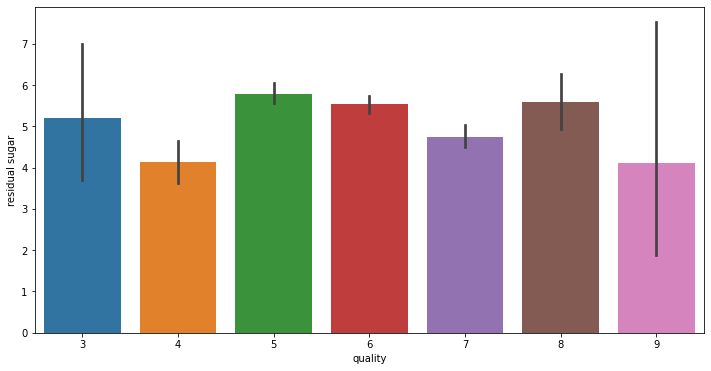

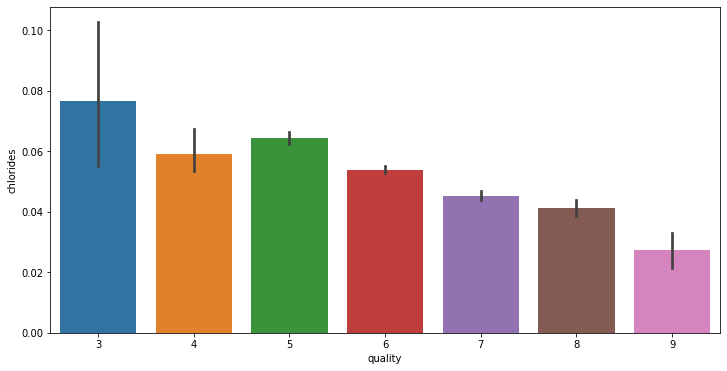

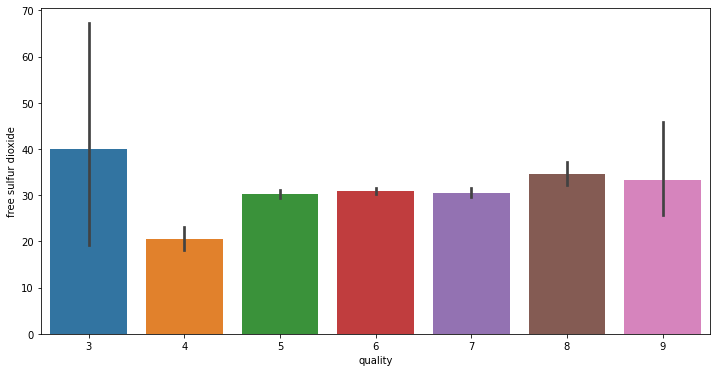

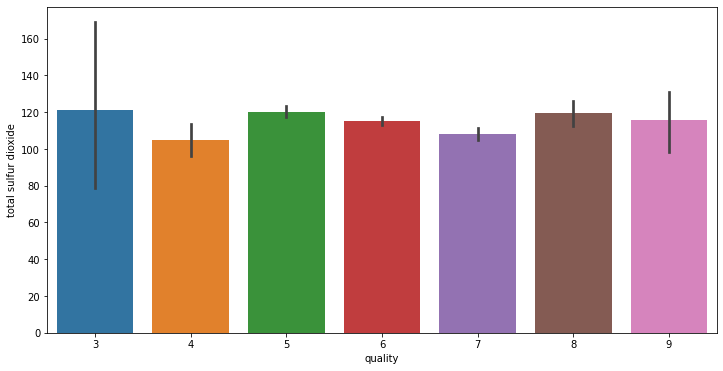

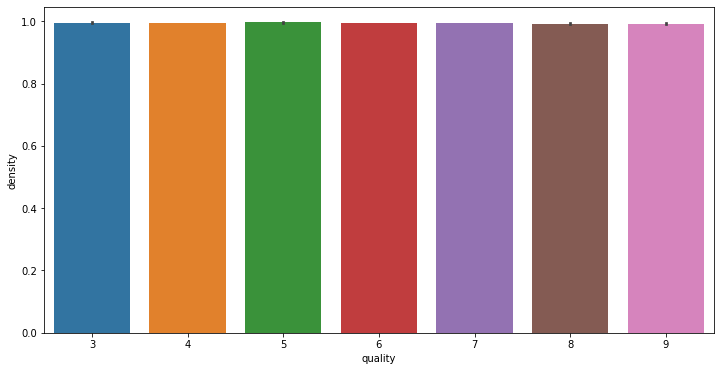

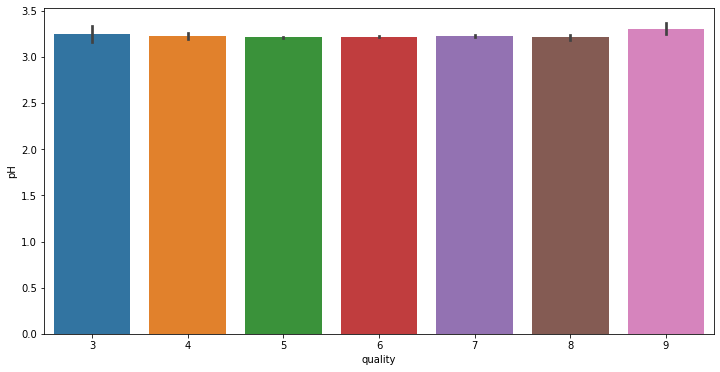

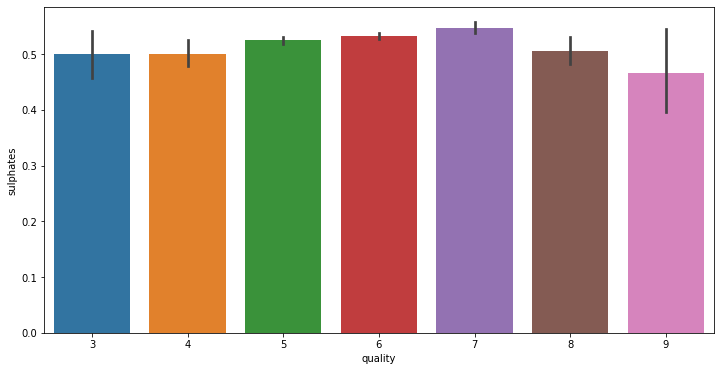

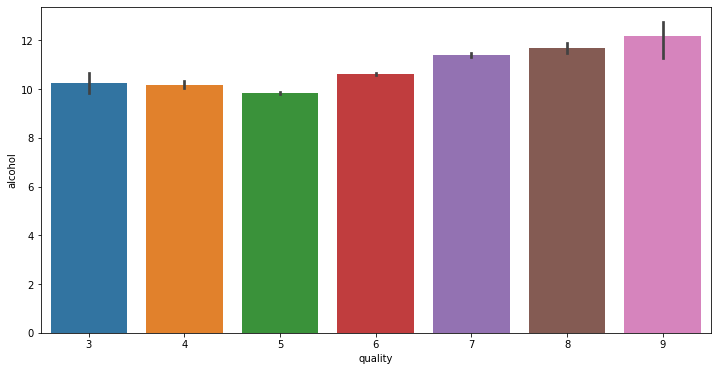

In [11]:
#train에서 각 변수와 quality 변수 사이 분포를 확인합니다
for i in range(11):
  fig =plt.figure(figsize=(12,6))
  sns.barplot(x='quality',y=train.columns[i+2],data=train)

#데이터 전처리

In [13]:
#type에는 white와 red 두 종류가 있음(로세는 없는 경우 인듯?)
#각각 0,1로 변환시킨다.
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
enc.fit(train['type'])
train['type']=enc.transform(train['type'])
test['type']=enc.transform(test['type'])

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [15]:
#불필요한 변수 제거
train_x=train.drop(['index','quality'],axis=1)
train_y=train['quality']
test_x=test.drop('index',axis=1)

train_x.shape,train_y.shape,test_x.shape

((5497, 12), (5497,), (1000, 12))

#모델링 진행

In [17]:
from sklearn.ensemble import RandomForestClassifier
#모델 선언
model=RandomForestClassifier()
#모델 학습
model.fit(train_x,train_y)

RandomForestClassifier()

In [18]:
#학습된 모델로 test 데이터 예측
y_pred=model.predict(test_x)

#제출 파일 생성

In [21]:
submission=pd.read_csv('/content/gdrive/MyDrive/STUDY/Dacon22/와인품질분류/data/sample_submission.csv')
submission['quality']=y_pred

In [22]:
submission

,index,quality
0,0,6
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6
